In [2]:
import pandas as pd
import csv
import plotly.plotly as py
from plotly.graph_objs import *
from sklearn.cluster import KMeans
from sklearn.cluster import dbscan

%pylab inline

In [5]:
data = pd.read_csv('/Users/camillebustalinio/Desktop/Camille/term 2 project/airbnb data/final_data.csv')

In [6]:
data.head()

,Unnamed: 0,listing_id,id_x,date,reviewer_id,reviewer_name,comments,id_y,name,host_id,...,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,language,price_tag
0,0,8308113,47419975,2015-09-18,6288054,Colin,Host was excellent and was contactable / respo...,8308113,Luxury Elegant Lrg Studio PacHeight,8739745,...,Entire home/apt,350,1,1,2015-09-18,0.10,1,0,en,neutral
1,1,3320213,14805088,2014-06-26,17101713,Faye,The place was clean and spacious and the guy t...,3320213,Private Room with TWO Double Beds.,3553372,...,Private room,199,1,29,2015-10-11,1.18,11,365,en,exp
2,2,3320213,17192435,2014-08-08,182792,Jocelyne & Pontus,This place wasn't as pleasant as we hoped. Had...,3320213,Private Room with TWO Double Beds.,3553372,...,Private room,199,1,29,2015-10-11,1.18,11,365,en,exp
3,3,3320213,17597907,2014-08-14,19649465,Francesco,Si tratta di una piccola pensione/albergo.\nSt...,3320213,Private Room with TWO Double Beds.,3553372,...,Private room,199,1,29,2015-10-11,1.18,11,365,it,exp
4,4,3320213,18293826,2014-08-24,1104165,Daniel,"Nice room, cool neighbourhood. Note that this ...",3320213,Private Room with TWO Double Beds.,3553372,...,Private room,199,1,29,2015-10-11,1.18,11,365,en,exp


In [46]:
#select English comments on expensive listings
comments_exp = data[(data.language=='en')& (data.price_tag=='exp')]['comments']
#comments_exp = [nltk.word_tokenize(i.lower()) for i in comments_exp]
len(comments_exp)

9240

In [49]:
comments_exp[9239]

['i',
 'had',
 'to',
 'be',
 'in',
 'san',
 'francisco',
 'for',
 'two',
 'weeks',
 'and',
 'my',
 'family',
 'tagged',
 'along',
 '.',
 'igor',
 'is',
 'a',
 'great',
 'host',
 'and',
 'very',
 'responsive',
 'and',
 'attentive',
 'to',
 'our',
 'requests',
 '.',
 'his',
 'place',
 'was',
 'great',
 ',',
 'very',
 'clean',
 'and',
 'welcoming',
 '.',
 'the',
 'unit',
 'is',
 'well',
 'equipped',
 ',',
 'modern',
 'and',
 'convenient',
 '.',
 'the',
 'location',
 'is',
 'very',
 'convenient',
 'for',
 'driving',
 ',',
 'uber',
 'and',
 'even',
 'bus',
 'to',
 'the',
 'financial',
 'district',
 '.',
 'the',
 'location',
 'is',
 'also',
 'walking',
 'distance',
 'to',
 'clement',
 'street',
 'with',
 'many',
 'great',
 'restaurants',
 '.',
 'it',
 'is',
 'also',
 'great',
 'for',
 'jogging',
 'in',
 'the',
 'afternoon',
 'near',
 'fell',
 'street',
 'on',
 'panhandle',
 'park',
 '.']

In [19]:
import nltk

In [35]:
comments_exp_tokens = nltk.word_tokenize(comments_exp[0])
comments_exp_tokens

['The',
 'place',
 'was',
 'clean',
 'and',
 'spacious',
 'and',
 'the',
 'guy',
 'there',
 'was',
 'pretty',
 'nice',
 'and',
 'helpful',
 '.',
 'Only',
 'thing',
 'was',
 'that',
 'the',
 'old',
 'lady',
 'charged',
 'me',
 '$',
 '25',
 'for',
 'keeping',
 'my',
 'luggage',
 'for',
 '5',
 'hours',
 '.']

In [26]:
type(comments_exp)

pandas.core.series.Series

In [29]:

comments_exp_list

['The place was clean and spacious and the guy there was pretty nice and helpful. Only thing was that the old lady charged me $25 for keeping my luggage for 5 hours.  ',
 "This place wasn't as pleasant as we hoped. Had a strong smell throughout the hotel. Our room was hot and and the room was a bit cluttered. Other than that it's ok for a last minute stay and the location is great.",
 'Nice room, cool neighbourhood. Note that this is a hotel',
 'The listing was accurate and the location was very good. There was a slight smell of curry in the hallways but it was never in our room and it never bothered us all too much! Also it was very hot at night so we left our windows open so we heard a lot of noise, but it was manageable!\r\nThe check in and out was quick and easy- maybe a little abrupt but everything that was needed was achieved.\r\nThe wifi password was readily available and the signal was strong!\r\nWe thought the pricing was maybe a little pricy but the area was good with lots of

In [50]:
comments_exp = data[(data.language=='en')& (data.price_tag=='exp')]['comments']

In [51]:
comments_exp_list = [i.lower() for i in comments_exp]

In [52]:
comments_exp_one_string = ''.join(comments_exp_list)

In [53]:
comments_exp_one_string

'the place was clean and spacious and the guy there was pretty nice and helpful. only thing was that the old lady charged me $25 for keeping my luggage for 5 hours.  this place wasn\'t as pleasant as we hoped. had a strong smell throughout the hotel. our room was hot and and the room was a bit cluttered. other than that it\'s ok for a last minute stay and the location is great.nice room, cool neighbourhood. note that this is a hotelthe listing was accurate and the location was very good. there was a slight smell of curry in the hallways but it was never in our room and it never bothered us all too much! also it was very hot at night so we left our windows open so we heard a lot of noise, but it was manageable!\r\nthe check in and out was quick and easy- maybe a little abrupt but everything that was needed was achieved.\r\nthe wifi password was readily available and the signal was strong!\r\nwe thought the pricing was maybe a little pricy but the area was good with lots of good places t

In [129]:
comments_exp_tokens = [nltk.word_tokenize(comments_exp_one_string)]

In [94]:
stop_words = set(nltk.corpus.stopwords.words('english'))

In [98]:
stop_words = set(nltk.corpus.stopwords.words('english'))
stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}']) # remove it if you need punctuation 
#list_of_words = [i.lower() for i in wordpunct_tokenize(doc) if i.lower() not in stop_words]
comments_exp_tokens_no_stop = [w for w in comments_exp_tokens if w not in stop_words]
comments_exp_tokens_no_stop

['place',
 'clean',
 'spacious',
 'guy',
 'pretty',
 'nice',
 'helpful',
 'thing',
 'old',
 'lady',
 'charged',
 '$',
 '25',
 'keeping',
 'luggage',
 '5',
 'hours',
 'place',
 "n't",
 'pleasant',
 'hoped',
 'strong',
 'smell',
 'throughout',
 'hotel',
 'room',
 'hot',
 'room',
 'bit',
 'cluttered',
 "'s",
 'ok',
 'last',
 'minute',
 'stay',
 'location',
 'great.nice',
 'room',
 'cool',
 'neighbourhood',
 'note',
 'hotelthe',
 'listing',
 'accurate',
 'location',
 'good',
 'slight',
 'smell',
 'curry',
 'hallways',
 'never',
 'room',
 'never',
 'bothered',
 'us',
 'much',
 'also',
 'hot',
 'night',
 'left',
 'windows',
 'open',
 'heard',
 'lot',
 'noise',
 'manageable',
 'check',
 'quick',
 'easy-',
 'maybe',
 'little',
 'abrupt',
 'everything',
 'needed',
 'achieved',
 'wifi',
 'password',
 'readily',
 'available',
 'signal',
 'strong',
 'thought',
 'pricing',
 'maybe',
 'little',
 'pricy',
 'area',
 'good',
 'lots',
 'good',
 'places',
 'eat',
 'nearby',
 'transport',
 'links',
 'grea

In [99]:
comments_exp_fdist = nltk.FreqDist(word.lower() for word in comments_exp_tokens_no_stop)

In [100]:
comments_exp_vocab_list = [[key,value] for key,value in comments_exp_fdist.items()]

In [101]:
comments_exp_vocab_list[1]

['european', 1]

In [102]:
#data.sort(key=lambda tup: tup[1])  
comments_exp_vocab_list.sort(key=lambda tup: tup[1], reverse= True)
comments_exp_vocab_list

[['great', 6277],
 ['stay', 4891],
 ['place', 4423],
 ['house', 3924],
 ["'s", 3903],
 ['us', 3180],
 ['home', 2969],
 ['host', 2768],
 ['location', 2698],
 ['would', 2552],
 ['clean', 2507],
 ['room', 2312],
 ['nice', 2304],
 ['comfortable', 2162],
 ['san', 2077],
 ['apartment', 2068],
 ['time', 1915],
 ['recommend', 1854],
 ['really', 1853],
 ['everything', 1843],
 ['beautiful', 1745],
 ['perfect', 1719],
 ["n't", 1680],
 ['francisco', 1679],
 ['well', 1636],
 ['easy', 1550],
 ['city', 1507],
 ['space', 1485],
 ['definitely', 1475],
 ['also', 1472],
 ['-', 1462],
 ['amazing', 1449],
 ['experience', 1428],
 ['made', 1360],
 ['wonderful', 1350],
 ['sf', 1345],
 ['good', 1339],
 ['neighborhood', 1311],
 ['staying', 1264],
 ['like', 1209],
 ['could', 1198],
 ['one', 1136],
 ['helpful', 1130],
 ['even', 1116],
 ['back', 1091],
 ['highly', 1076],
 ['area', 1058],
 ['get', 1042],
 ['restaurants', 1032],
 ['view', 1002],
 ['hosts', 987],
 ['friendly', 984],
 ['feel', 966],
 ['lovely', 966],


Populating the interactive namespace from numpy and matplotlib


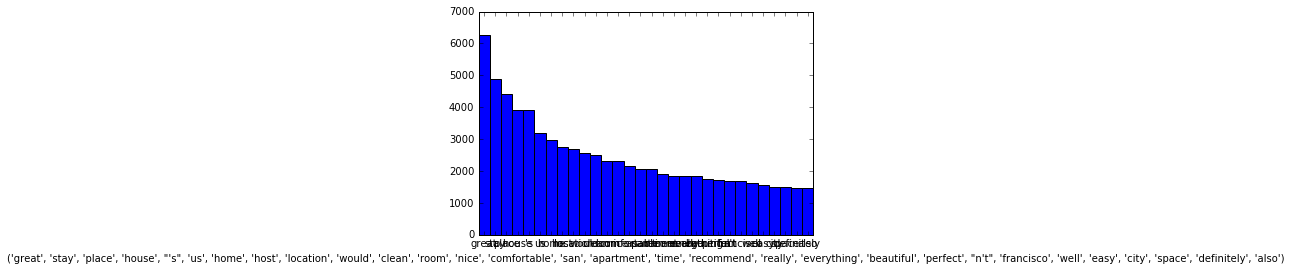

In [121]:
labels, values = zip(*comments_exp_vocab_list[:30])

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.xlabel(labels,rotation=0)
#plt.set_xticklabels(labels, rot90)
#ax.set_xticklabels(xlabels, rotation=40, ha=ha[n])

plt.show();


In [125]:
#select English comments on cheap listings
comments_cheap = data[(data.language=='en')& (data.price_tag=='cheap')]['comments']

len(comments_cheap)

42928

In [35]:
comments_cheap_tokens = nltk.word_tokenize(comments_exp[0])
comments_exp_tokens

['The',
 'place',
 'was',
 'clean',
 'and',
 'spacious',
 'and',
 'the',
 'guy',
 'there',
 'was',
 'pretty',
 'nice',
 'and',
 'helpful',
 '.',
 'Only',
 'thing',
 'was',
 'that',
 'the',
 'old',
 'lady',
 'charged',
 'me',
 '$',
 '25',
 'for',
 'keeping',
 'my',
 'luggage',
 'for',
 '5',
 'hours',
 '.']

In [131]:
comments_cheap_list = [i.lower() for i in comments_cheap]
comments_cheap_one_string = ''.join(comments_cheap_list)
comments_cheap_tokens = nltk.word_tokenize(comments_cheap_one_string)
#comments_cheap_tokens = [nltk.word_tokenize(comments_cheap_one_string)]
comments_cheap_tokens_no_stop = [w for w in comments_cheap_tokens if w not in stop_words]
comments_cheap_fdist = nltk.FreqDist(word.lower() for word in comments_cheap_tokens_no_stop)
comments_cheap_vocab_list = [[key,value] for key,value in comments_cheap_fdist.items()]
comments_cheap_vocab_list.sort(key=lambda tup: tup[1], reverse= True)
comments_cheap_vocab_list


[['great', 29433],
 ['stay', 24674],
 ['place', 23129],
 ["'s", 20190],
 ['apartment', 17360],
 ['clean', 15337],
 ['location', 14871],
 ['us', 13816],
 ['nice', 13106],
 ['would', 12881],
 ['room', 11442],
 ['host', 11053],
 ['comfortable', 10406],
 ['san', 10151],
 ['really', 9445],
 ["n't", 9322],
 ['everything', 9284],
 ['time', 8605],
 ['easy', 8437],
 ['recommend', 8280],
 ['francisco', 8012],
 ['perfect', 7980],
 ['good', 7750],
 ['neighborhood', 7589],
 ['also', 7425],
 ['definitely', 7315],
 ['well', 7279],
 ['city', 7184],
 ['home', 6817],
 ['quiet', 6662],
 ['house', 6471],
 ['close', 6320],
 ['sf', 6261],
 ['get', 6007],
 ['-', 5994],
 ['helpful', 5983],
 ['area', 5960],
 ['bed', 5868],
 ['restaurants', 5731],
 ['experience', 5606],
 ['made', 5542],
 ['like', 5284],
 ['staying', 5269],
 ['even', 5200],
 ['could', 5188],
 ['wonderful', 5076],
 ['one', 4993],
 ['needed', 4956],
 ['friendly', 4911],
 ['street', 4875],
 ['walk', 4864],
 ['space', 4837],
 ['around', 4727],
 ['ba

In [136]:

out = csv.writer(open("expensive_words.csv","w"), delimiter=',',quoting=csv.QUOTE_ALL)
out.writerow(comments_exp_vocab_list)

182634

In [135]:
out = csv.writer(open("cheap_words.csv","w"), delimiter=',',quoting=csv.QUOTE_ALL)
out.writerow(comments_cheap_vocab_list)

785991

In [145]:

exp_vocab_csv = pd.DataFrame(data = comments_exp_vocab_list, columns=['words','counts'])
exp_vocab_csv.to_csv('expensive_vocab.csv')
cheap_vocab_csv = pd.DataFrame(data = comments_cheap_vocab_list, columns=['words','counts'])
cheap_vocab_csv.to_csv('cheap_vocab.csv')

In [157]:
exp_vocab_csv['rank'] = exp_vocab_csv.index

cheap_vocab_csv['rank'] = cheap_vocab_csv.index

In [169]:
joined_vocab = cheap_vocab_csv.merge(exp_vocab_csv, on='words', how="outer", suffixes=("_cheap", "_exp"))
joined_vocab.head(60)

,words,counts_cheap,rank_cheap,counts_exp,rank_exp
0,great,29433.0,0.0,6277.0,0.0
1,stay,24674.0,1.0,4891.0,1.0
2,place,23129.0,2.0,4423.0,2.0
3,'s,20190.0,3.0,3903.0,4.0
4,apartment,17360.0,4.0,2068.0,15.0
5,clean,15337.0,5.0,2507.0,10.0
6,location,14871.0,6.0,2698.0,8.0
7,us,13816.0,7.0,3180.0,5.0
8,nice,13106.0,8.0,2304.0,12.0
9,would,12881.0,9.0,2552.0,9.0


In [159]:
joined_vocab.to_csv('joined_vocab.csv')

In [5]:
joined_vocab = pd.read_csv('joined_vocab.csv')

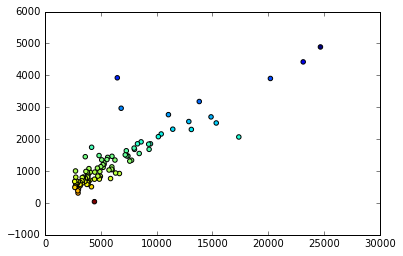

In [13]:
plt.scatter(joined_vocab.counts_cheap[:100],joined_vocab.counts_exp[:100], c = np.log(joined_vocab.rank_exp[:100]) );
#plt.plot(range(50));


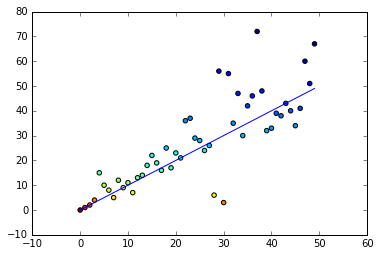

In [11]:
plt.scatter(joined_vocab.rank_cheap[:50],joined_vocab.rank_exp[:50], c = np.log(joined_vocab.counts_exp[:50]) );
plt.plot(range(50));


In [ ]:
#tried POS and NER tagging but failed

In [23]:
nltk.ne_chunk(nltk.pos_tag(joined_vocab.words[:5]))

LookupError: 

===========================================================================
NLTK was unable to find the gs file!
Use software specific configuration paramaters or set the PATH environment variable.
===========================================================================

Tree('S', [('great', 'JJ'), ('stay', 'JJ'), ('place', 'NN'), ("'s", 'POS'), ('apartment', 'NN')])

In [28]:
joined_vocab['pos_tag']=nltk.pos_tag(str(joined_vocab.words))
joined_vocab['pos_tag'][:5]

ValueError: Length of values does not match length of index

In [41]:
nltk.pos_tag(joined_vocab.words[:200])

[('great', 'JJ'),
 ('stay', 'JJ'),
 ('place', 'NN'),
 ("'s", 'POS'),
 ('apartment', 'JJ'),
 ('clean', 'JJ'),
 ('location', 'NN'),
 ('us', 'PRP'),
 ('nice', 'JJ'),
 ('would', 'MD'),
 ('room', 'NN'),
 ('host', 'NN'),
 ('comfortable', 'JJ'),
 ('san', 'NNS'),
 ('really', 'RB'),
 ("n't", 'RB'),
 ('everything', 'NN'),
 ('time', 'NN'),
 ('easy', 'JJ'),
 ('recommend', 'NN'),
 ('francisco', 'NN'),
 ('perfect', 'NN'),
 ('good', 'JJ'),
 ('neighborhood', 'NN'),
 ('also', 'RB'),
 ('definitely', 'RB'),
 ('well', 'RB'),
 ('city', 'NN'),
 ('home', 'NN'),
 ('quiet', 'JJ'),
 ('house', 'NN'),
 ('close', 'JJ'),
 ('sf', 'NN'),
 ('get', 'NN'),
 ('-', ':'),
 ('helpful', 'JJ'),
 ('area', 'NN'),
 ('bed', 'VBD'),
 ('restaurants', 'NNS'),
 ('experience', 'NN'),
 ('made', 'VBN'),
 ('like', 'IN'),
 ('staying', 'VBG'),
 ('even', 'RB'),
 ('could', 'MD'),
 ('wonderful', 'VB'),
 ('one', 'CD'),
 ('needed', 'VBN'),
 ('friendly', 'RB'),
 ('street', 'JJ'),
 ('walk', 'VBP'),
 ('space', 'NN'),
 ('around', 'IN'),
 ('back', '

In [16]:


trace0 = Scatter(
  x=joined_vocab.counts_cheap[:100],
  y=joined_vocab.counts_exp[:100],
  mode="markers",
  text=joined_vocab.words[:100]

)
# trace1 = Scatter(
#   x=[1, 2, 3, 4],
#   y=[16, 5, 11, 9]
# )
data = Data([trace0])

py.iplot(data)

In [17]:

trace0 = Scatter(
  x=joined_vocab.counts_cheap[101:200],
  y=joined_vocab.counts_exp[101:200],
  mode="markers",
  text=joined_vocab.words[101:200]

)
# trace1 = Scatter(
#   x=[1, 2, 3, 4],
#   y=[16, 5, 11, 9]
# )
data = Data([trace0])

py.iplot(data)

In [42]:

trace0 = Scatter(
  x=joined_vocab.counts_cheap,
  y=joined_vocab.counts_exp,
  mode="markers",
  text=joined_vocab.words

)
# trace1 = Scatter(
#   x=[1, 2, 3, 4],
#   y=[16, 5, 11, 9]
# )
data = Data([trace0])

py.iplot(data)

/Applications/anaconda/lib/python3.5/site-packages/plotly/plotly/plotly.py:236: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



The draw time for this plot will be slow for clients without much RAM.


/Applications/anaconda/lib/python3.5/site-packages/plotly/plotly/plotly.py:1443: UserWarning:

Estimated Draw Time Slow



In [51]:


common_words = joined_vocab[['words','counts_cheap','counts_exp']].dropna()
common_words.head(3), common_words.describe()
X=common_words[['counts_cheap','counts_exp']]
cluster = KMeans(n_clusters=2)
cluster.fit(X)
common_words['cluster'] = cluster.predict(X)

In [55]:

trace0 = Scatter(
  x=common_words.counts_cheap,
  y=common_words.counts_exp,
  mode="markers",
  text=common_words.words,
  marker=dict(
        size=10,
        symbol = "circle-open",
        color=common_words.cluster,
        #colorscale='Greens',   # choose a colorscale
        opacity=0.8)

)
# trace1 = Scatter(
#   x=[1, 2, 3, 4],
#   y=[16, 5, 11, 9]
# )
data = Data([trace0])

py.iplot(data)

In [56]:
from sklearn.metrics.pairwise import cosine_similarity

In [59]:
X.median()

counts_cheap    9.0
counts_exp      2.0
dtype: float64

In [63]:
cosine_sim = cosine_similarity(X)
cosine_sim

array([[ 1.        ,  0.99989592,  0.99977601, ...,  0.62393181,
         0.50714319,  0.62393181],
       [ 0.99989592,  1.        ,  0.9999773 , ...,  0.61259194,
         0.49465573,  0.61259194],
       [ 0.99977601,  0.9999773 ,  1.        , ...,  0.60725271,
         0.48878901,  0.60725271],
       ..., 
       [ 0.62393181,  0.61259194,  0.60725271, ...,  1.        ,
         0.98994949,  1.        ],
       [ 0.50714319,  0.49465573,  0.48878901, ...,  0.98994949,
         1.        ,  0.98994949],
       [ 0.62393181,  0.61259194,  0.60725271, ...,  1.        ,
         0.98994949,  1.        ]])

In [73]:
db_clustering = dbscan(cosine_sim, metric='precomputed')
db_clustering[1]

array([0, 0, 0, ..., 0, 0, 0])

In [74]:
import numpy as np

In [75]:
np.unique(db_clustering[1])

array([-1,  0])

In [76]:
db_clusters = [db_clustering[1]]
len(db_clusters)

1

In [83]:
db_clusters[0]

array([0, 0, 0, ..., 0, 0, 0])

In [81]:
[i for i in db_clusters]

[array([0, 0, 0, ..., 0, 0, 0])]

In [85]:

trace0 = Scatter(
  x=np.log(common_words.counts_cheap),
  y=common_words.counts_exp,
  mode="markers",
  text=common_words.words,
  marker=dict(
        size=10,
        symbol = "circle-open",
        color=db_clusters,
        #colorscale='Greens',   # choose a colorscale
        opacity=0.8)

)
# trace1 = Scatter(
#   x=[1, 2, 3, 4],
#   y=[16, 5, 11, 9]
# )
data = Data([trace0])

py.iplot(data)